In [ ]:
!pip install pycaret

     |████████████████████████████████| 263 kB 7.9 MB/s 
     |████████████████████████████████| 1.7 MB 14.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 44.7 MB/s 
     |████████████████████████████████| 248 kB 50.4 MB/s 
     |████████████████████████████████| 80 kB 10.3 MB/s 
     |████████████████████████████████| 2.0 MB 47.8 MB/s 
     |████████████████████████████████| 6.8 MB 49.2 MB/s 
     |████████████████████████████████| 105 kB 59.7 MB/s 
     |████████████████████████████████| 167 kB 47.0 MB/s 
     |████████████████████████████████| 271 kB 61.8 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 14.4 MB 60 kB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 1.1 MB 17.0 MB/s 
     |████████████████████

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive   #wget! is also an option to directly access from github
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
df = pd.read_csv('drive/My Drive/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data_unseen = df.sample(frac=0.9, random_state=42)      # Sample 10% of the data to become the unseen test set
data = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (28481, 31)
Unseen Data For Predictions: (256326, 31)


In [ ]:
from pycaret.classification import *

In [ ]:
expt_basic = setup(
    data = data, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    numeric_imputation="median",        # "mean" by default
    log_experiment = True,       
    categorical_imputation="mode",
    normalize=True,                  #by default normalize_method -> z-score
    fix_imbalance = True             #by default SMOTE is applied
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(28481, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
top5 = compare_models(sort="F1",  exclude=['rf','gbc'],fold=5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9993,0.9769,0.7911,0.8724,0.8227,0.8224,0.8269,1.796
lightgbm,Light Gradient Boosting Machine,0.9988,0.8984,0.7267,0.6983,0.7051,0.7045,0.7082,1.156
knn,K Neighbors Classifier,0.9982,0.9173,0.7933,0.5547,0.6418,0.6410,0.6567,9.320
ada,Ada Boost Classifier,0.9980,0.9704,0.7711,0.5832,0.6250,0.6241,0.6494,7.014
dt,Decision Tree Classifier,0.9974,0.8191,0.6400,0.4613,0.5200,0.5188,0.5337,1.304
svm,SVM - Linear Kernel,0.9902,0.0000,0.7911,0.1988,0.2945,0.2922,0.3728,0.128
qda,Quadratic Discriminant Analysis,0.9863,0.9150,0.8111,0.2007,0.2871,0.2847,0.3660,0.126
lr,Logistic Regression,0.9894,0.9383,0.8778,0.1827,0.2844,0.2820,0.3800,1.052
nb,Naive Bayes,0.9796,0.9693,0.8556,0.0812,0.1481,0.1448,0.2593,0.082
ridge,Ridge Classifier,0.9815,0.0000,0.7956,0.0816,0.1473,0.1442,0.2497,0.080


In [ ]:
et = create_model("et", fold=10)
tuned_et = tune_model(et, fold=5, optimize="F1")
print(et, "\n")
print(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9999,0.8889,0.8889,0.8889,0.8887,0.8887
1,0.9998,0.9999,0.8889,1.0000,0.9412,0.9411,0.9427
2,0.9991,0.9782,0.8000,0.8000,0.8000,0.7996,0.7996
3,0.9991,0.9047,0.7000,0.8750,0.7778,0.7773,0.7822
4,0.9993,0.9990,0.8889,0.8000,0.8421,0.8418,0.8429
Mean,0.9994,0.9763,0.8333,0.8728,0.8500,0.8497,0.8512
SD,0.0003,0.0368,0.0750,0.0735,0.0593,0.0595,0.0588


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False) 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_sta

In [ ]:
lgbm = create_model("lightgbm", fold=10)
tuned_lgbm = tune_model(lgbm, fold=5, optimize="F1")
print(lgbm, "\n")
print(tuned_lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9989,0.9995,0.7778,0.7000,0.7368,0.7363,0.7373
1,0.9993,0.9999,0.8889,0.8000,0.8421,0.8418,0.8429
2,0.9987,0.8477,0.8000,0.6667,0.7273,0.7266,0.7297
3,0.9989,0.8983,0.6000,0.8571,0.7059,0.7053,0.7166
4,0.9991,0.9996,0.8889,0.7273,0.8000,0.7996,0.8036
Mean,0.9990,0.9490,0.7911,0.7502,0.7624,0.7619,0.7660
SD,0.0002,0.0641,0.1057,0.0692,0.0507,0.0508,0.0488


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.3, n_estimators=190, n_jobs=-1, num_leaves=10,
               objective=None, random_state=42, reg_alpha=0.1, reg_lambda=0.05,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_

In [ ]:
knn = create_model("knn", fold=10)
tuned_knn = tune_model(knn, fold=5, optimize="F1")
print(knn, "\n")
print(tuned_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9441,0.8889,0.7273,0.8000,0.7996,0.8036
1,0.9993,0.9997,1.0000,0.7500,0.8571,0.8568,0.8657
2,0.9993,0.8999,0.8000,0.8889,0.8421,0.8418,0.8429
3,0.9978,0.7495,0.4000,0.5000,0.4444,0.4434,0.4461
4,0.9989,0.8885,0.7778,0.7000,0.7368,0.7363,0.7373
Mean,0.9989,0.8963,0.7733,0.7132,0.7361,0.7356,0.7392
SD,0.0006,0.0832,0.2024,0.1249,0.1517,0.1520,0.1529


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform') 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


In [ ]:
ada = create_model("ada", fold=10)
tuned_ada = tune_model(ada, fold=5, optimize="F1")
print(ada, "\n")
print(tuned_ada) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9901,0.9778,0.7778,0.1400,0.2373,0.2347,0.3275
1,0.9947,0.9986,0.8889,0.2581,0.4000,0.3982,0.4774
2,0.9943,0.9724,0.9000,0.2647,0.4091,0.4071,0.4864
3,0.9982,0.9384,0.6000,0.6000,0.6000,0.5991,0.5991
4,0.9908,0.9988,0.8889,0.1633,0.2759,0.2734,0.3788
Mean,0.9936,0.9772,0.8111,0.2852,0.3844,0.3825,0.4538
SD,0.0029,0.0221,0.1146,0.1650,0.1271,0.1277,0.0942


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=110, random_state=42)


In [ ]:
dt = create_model("dt", fold=10)
tuned_dt = tune_model(dt, fold=5, optimize="F1")
print(dt, "\n")
print(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9954,0.8740,0.7778,0.2692,0.4000,0.3982,0.4560
1,0.9963,0.9439,0.8889,0.3333,0.4848,0.4834,0.5431
2,0.9980,0.8992,0.8000,0.5333,0.6400,0.6390,0.6523
3,0.9961,0.6987,0.4000,0.2500,0.3077,0.3058,0.3143
4,0.9960,0.8295,0.6667,0.2857,0.4000,0.3983,0.4349
Mean,0.9964,0.8491,0.7067,0.3343,0.4465,0.4450,0.4801
SD,0.0009,0.0838,0.1689,0.1033,0.1118,0.1121,0.1129


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best') 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [ ]:
metrics = pd.DataFrame({'Model':['Extra Trees Classifier','Light GBM','K Neighbors Classifier','Ada Boost Classifier','Decision Tree Classifier'],'Initial F1 Score':[0.8227,0.7051,0.6418,0.6250,0.5200],'Fine-Tuned F1 Score':[0.8500, 0.8000, 0.7361,0.3844,0.4465]})
metrics

,Model,Initial F1 Score,Fine-Tuned F1 Score
0,Extra Trees Classifier,0.8227,0.8500
1,Light GBM,0.7051,0.8000
2,K Neighbors Classifier,0.6418,0.7361
3,Ada Boost Classifier,0.6250,0.3844
4,Decision Tree Classifier,0.5200,0.4465


In [ ]:
blended_model = blend_models(estimator_list=[tuned_et, tuned_lgbm, tuned_knn, tuned_ada, tuned_dt])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9991,0.9987,0.8000,0.8000,0.8000,0.7996,0.7996
2,0.9991,0.9998,0.8000,0.8000,0.8000,0.7996,0.7996
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9991,0.9619,0.7500,0.7500,0.7500,0.7496,0.7496
5,0.9996,0.9995,0.7500,1.0000,0.8571,0.8569,0.8658
6,0.9996,0.7787,0.7500,1.0000,0.8571,0.8569,0.8658
7,0.9982,0.9926,0.4000,0.6667,0.5000,0.4992,0.5156
8,0.9991,0.9989,0.8000,0.8000,0.8000,0.7996,0.7996
9,0.9987,0.9992,0.8000,0.6667,0.7273,0.7266,0.7297


In [ ]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9989,0.9998,1.0,0.5,0.6667,0.6662,0.7067


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.609851,0.745107,-0.542146,-1.577523,0.326892,0.273918,-0.208570,0.426197,-0.210632,0.841176,-0.926727,-0.959705,0.403562,0.689523,-1.648204,-0.020343,0.190532,0.977924,0.203452,0.269313,0.672886,-0.129625,-1.006585,-0.237723,-0.100095,-0.106881,-0.226333,-0.162201,0.106685,0.878272,0,0,0.8533
1,1.150327,-0.658296,0.328628,0.581734,-0.406821,-0.071680,-0.051751,-0.040339,0.291883,0.265642,-0.642786,-1.223861,0.517514,1.065292,-0.388188,-0.113785,0.442202,-0.610847,0.198492,-0.382613,-0.401251,0.473321,1.438219,0.003440,1.365328,-0.567535,1.085829,-0.808807,0.322106,-0.212334,0,0,0.8845
2,0.677888,0.980690,-0.104825,-0.495604,0.862654,-0.132378,-0.189592,-0.216574,0.027423,0.549495,0.373353,0.277553,0.448620,-0.908971,0.505412,-0.410704,0.453557,-1.014230,0.722500,-0.071478,-0.317122,0.104734,0.370233,0.175917,-0.638613,-0.037228,-1.348182,0.054412,-0.149826,-0.238143,0,0,0.8722
3,-0.337693,-0.274736,0.525424,0.796468,-0.184074,0.671542,1.047082,0.248738,0.546024,-0.659318,-0.491367,2.433405,1.151758,0.289968,-0.199149,1.373490,-0.797103,1.109217,-1.937122,-1.657343,0.018250,-0.124598,-0.088942,0.154208,-1.751805,-0.928749,0.381646,0.778755,0.224665,-0.311946,0,0,0.8734
4,0.630109,1.084504,-0.418273,-0.714617,-0.203953,-0.718066,-1.176080,-0.273752,-0.311479,-0.399157,0.933864,-0.751509,-0.684925,-0.986438,0.542470,0.683063,-1.699805,-0.004630,1.323543,-1.433464,-0.809467,-0.162155,0.213790,0.300516,0.752135,-0.319065,1.596897,-0.176855,-0.180019,-0.248760,0,0,0.8822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,-0.792876,-0.358428,0.192456,1.904159,1.434931,-1.611633,1.422974,-1.313577,-1.617223,1.342712,-0.418960,-0.786196,0.748004,-0.706582,-0.978034,-0.728144,-1.267578,1.522632,-0.442764,0.438272,-0.731163,3.303665,-0.050214,-0.877768,1.124925,2.297921,0.430891,1.053241,0.453787,0.281149,0,0,0.8578
5693,-0.317351,-0.366245,0.357674,0.733712,-0.803995,0.760461,-0.659201,1.085452,-0.438717,-0.461691,-0.462340,-0.861872,0.118827,0.999725,-0.215859,0.288577,0.421980,-1.054187,-0.941377,0.164335,0.030463,-0.640685,-1.710610,-0.274767,-0.699647,-0.322554,1.020567,-0.667741,-0.479367,-0.168257,0,0,0.8635
5694,0.933684,-0.115702,-2.618092,-1.441488,-0.048168,-1.146105,0.328889,0.669076,-0.165322,1.089221,-0.692961,0.505514,0.883181,0.334278,0.379904,0.789155,0.888218,-1.104631,1.224481,0.229853,2.817329,1.282827,0.009532,-1.487466,0.530067,-1.358289,1.157695,-0.676103,0.445449,4.075628,0,0,0.8872
5695,1.150642,1.009918,-0.040342,-1.712375,0.084412,0.669902,-0.787517,0.791918,-0.394860,-0.397542,0.328706,0.997207,0.916904,-0.032175,1.027989,-0.962991,-0.722620,-0.335539,-0.408216,0.352163,-0.063654,0.495826,1.366231,-0.319974,1.367629,1.097675,1.990344,-0.402966,-0.266429,-0.067877,0,0,0.8948


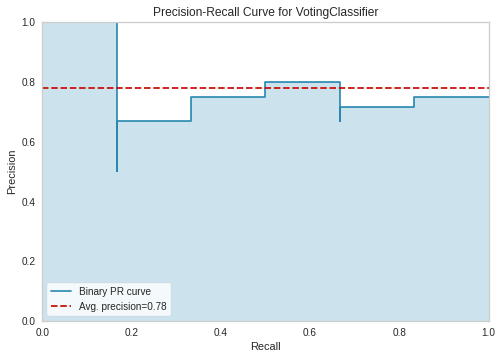

In [ ]:
#- Precision-Recall Curve
plot_model(blended_model, plot="pr")

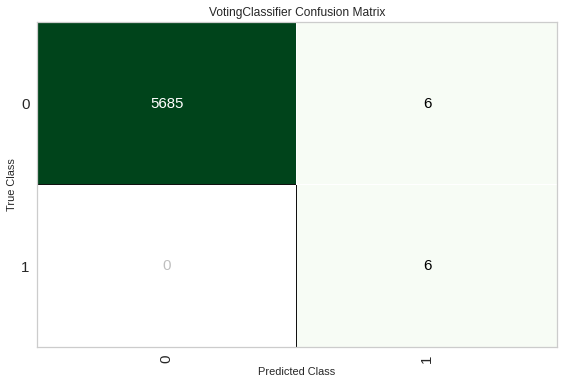

In [ ]:
#- Confusion Matrix
plot_model(blended_model, plot="confusion_matrix")

In [ ]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1,0.8886
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0,0.8887
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0,0.8629
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0,0.8709
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0,0.9000


In [24]:
#Accuracy, Precision, Recall & F1 Scores obtained.
from pycaret.utils import check_metric
print("Accuracy:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Accuracy'))
print("Precision:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision'))
print("Recall:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall'))
print("F1 Score:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1'))


Accuracy:	 0.9989
Precision:	 0.6579
Recall:	 0.7973
F1 Score:	 0.7209


In [26]:
save_model(blended_model, "drive/My Drive/blended_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=11,
         